In [9]:
import numpy as np # linear algebra
import pandas as pd

In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
df.columns = df.columns.str.replace(' ','_')

In [17]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.columns[df.isna().any()]

Index([], dtype='object')

<Axes: xlabel='quality', ylabel='citric_acid'>

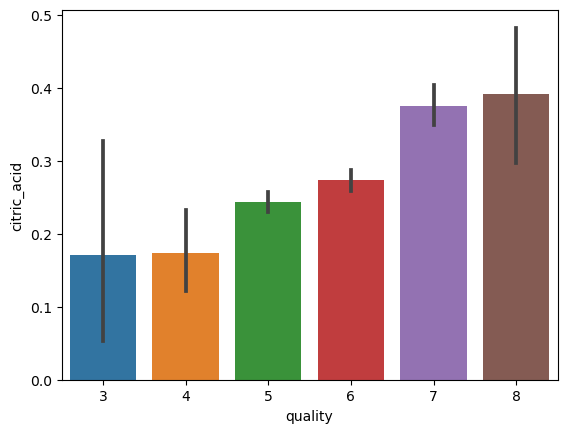

In [19]:
sns.barplot(x='quality',y='citric_acid',data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

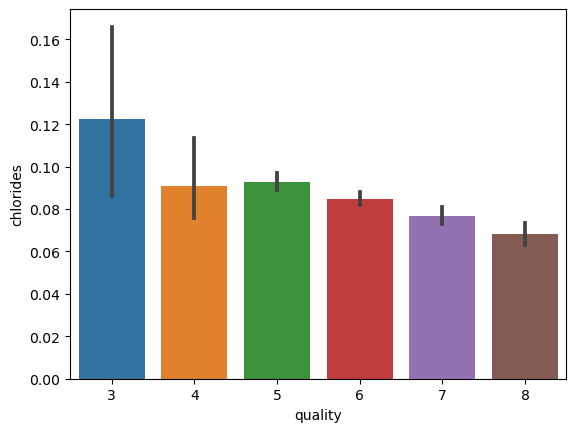

In [20]:
sns.barplot(x='quality',y='chlorides',data=df)

<Axes: xlabel='quality', ylabel='residual_sugar'>

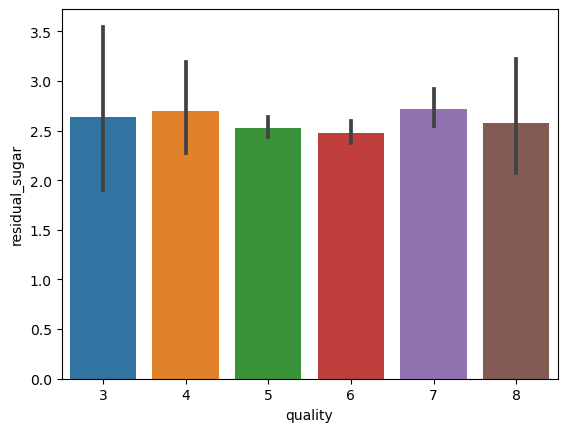

In [21]:
sns.barplot(x='quality',y='residual_sugar',data=df)

<Axes: xlabel='citric_acid', ylabel='fixed_acidity'>

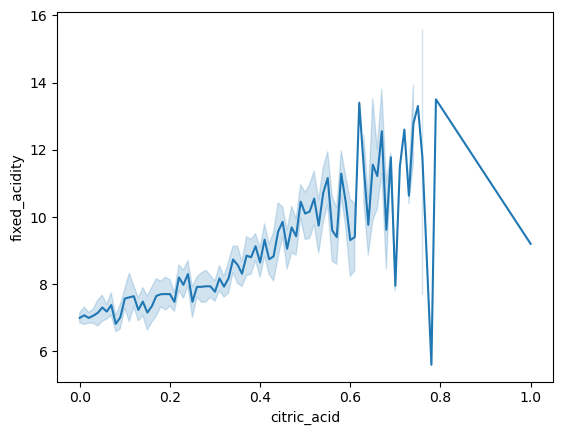

In [22]:
sns.lineplot(x='citric_acid',y='fixed_acidity',data=df)

In [23]:
def qualityupdate(df):
    for i,row in df.iterrows():
        val = row['quality']
        if val  <=6:
            df.at[i,'quality']=0
        else:
            df.at[i,'quality']=1
qualityupdate(df)

In [24]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x= df.drop(['quality'],axis=1)
y=df['quality']


In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [30]:
from sklearn.svm import SVC

In [31]:
reg = SVC()

In [33]:
reg.fit(xtrain,ytrain)

SVC()

In [34]:
reg.score(xtest,ytest)

0.875

In [35]:
yp = reg.predict(xtest)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
c = confusion_matrix(ytest,yp)

In [38]:
c

array([[268,   5],
       [ 35,  12]], dtype=int64)

<Axes: >

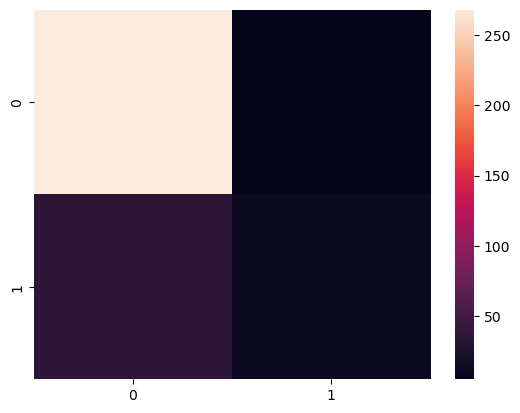

In [39]:
sns.heatmap(c)

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
model = GridSearchCV(reg,{
    'C':[0.1,0.4,0.8,1.0,1.3],
    'gamma':[0.1,0.4,0.8,1.0,1.3],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [44]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [45]:
GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 1.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [48]:
model.best_params_

{'C': 1.3, 'gamma': 1.0, 'kernel': 'rbf'}

In [49]:
mod = SVC(C=1.3,gamma=1.0,kernel='rbf')

In [50]:
mod.fit(xtrain,ytrain)

SVC(C=1.3, gamma=1.0)

In [51]:
mod.score(xtest,ytest)

0.896875

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=200)

In [54]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [55]:
rfc.score(xtest,ytest)

0.878125

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)

In [58]:
rfc2.mean()

0.9140194389763779

In [59]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [61]:
a = [[6.0,0.3,0.1,2.4,0.002,10.0,33.0,0.99,4.5,0.55,12.0]]
mod.predict(a)

array([0], dtype=int64)